In [15]:
import requests
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
minDrwNo = 1        #취득하고 싶은 회차 시작
maxDrwNo = 998        #취득하고 싶은 회차 종료
drwtNo1 = []        #1등 첫번째 번호
drwtNo2 = []        #1등 두번째 번호
drwtNo3 = []        #1등 세번째 번호
drwtNo4 = []        #1등 네번째 번호
drwtNo5 = []        #1등 다섯번째 번호
drwtNo6 = []        #1등 여섯번째 번호
bnusNo = []         #1등 보너스 번호
drwNoDate = []      #로또 추첨일

# 지정한 시작 회차 부터 종료 회차 까지 취득
for i in tqdm(range(minDrwNo, maxDrwNo + 1, 1)):

    # 1등 번호를 취득
    req_url = "https://www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo=" + str(i)

    req_lotto = requests.get(req_url)

    lottoNo = req_lotto.json()

    drwNoDate.append(lottoNo['drwNoDate'])  # 로또 추첨일
    drwtNo1.append(lottoNo['drwtNo1'])      #1등 첫번째 번호 저장
    drwtNo2.append(lottoNo['drwtNo2'])      #1등 두번째 번호 저장
    drwtNo3.append(lottoNo['drwtNo3'])      #1등 세번째 번호 저장
    drwtNo4.append(lottoNo['drwtNo4'])      #1등 네번째 번호 저장
    drwtNo5.append(lottoNo['drwtNo5'])      #1등 다섯번째 번호 저장
    drwtNo6.append(lottoNo['drwtNo6'])      #1등 여섯번째 번호 저장
    bnusNo.append(lottoNo['bnusNo'])   #1등 보너스 번호 저장

100%|██████████| 998/998 [01:21<00:00, 12.24it/s]


In [16]:
lotto_dict = {"추첨일":drwNoDate, "Num1":drwtNo1, "Num2":drwtNo2, "Num3":drwtNo3, "Num4":drwtNo4, "Num5":drwtNo5, "Num6":drwtNo6, "bnsNum":bnusNo,} 
df_lotto = pd.DataFrame(lotto_dict)

In [17]:
df_lotto

,추첨일,Num1,Num2,Num3,Num4,Num5,Num6,bnsNum
0,2002-12-07,10,23,29,33,37,40,16
1,2002-12-14,9,13,21,25,32,42,2
2,2002-12-21,11,16,19,21,27,31,30
3,2002-12-28,14,27,30,31,40,42,2
4,2003-01-04,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...
993,2021-12-18,1,3,8,24,27,35,28
994,2021-12-25,1,4,13,29,38,39,7
995,2022-01-01,6,11,15,24,32,39,28
996,2022-01-08,4,7,14,16,24,44,20


In [30]:
df_lotto['mean_num'] = df_lotto[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'bnsNum']].mean(axis=1)

In [69]:
df_lotto['std_num'] = df_lotto[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'bnsNum']].std(axis=1)

In [76]:
df_lotto['median_num'] = df_lotto[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'bnsNum']].median(axis=1)

In [75]:
df_lotto['list_num'].mode()

TypeError: unhashable type: 'list'

In [36]:
df_lotto.describe().T

,count,mean,std,min,25%,50%,75%,max
Num1,998.0,6.623246,5.313855,1.000000,2.000000,5.000000,10.000000,35.000000
Num2,998.0,13.028056,6.859181,2.000000,8.000000,12.000000,17.750000,37.000000
Num3,998.0,19.927856,7.457187,3.000000,14.000000,19.000000,25.000000,40.000000
Num4,998.0,26.264529,7.602866,5.000000,21.000000,27.000000,32.000000,43.000000
Num5,998.0,32.860721,6.857018,9.000000,28.000000,34.000000,38.000000,44.000000
Num6,998.0,39.529058,5.265342,19.000000,37.000000,41.000000,44.000000,45.000000
bnsNum,998.0,22.420842,13.198175,1.000000,11.000000,23.000000,34.000000,45.000000
mean,998.0,22.950616,4.634655,8.571429,19.892857,22.857143,26.285714,38.285714
mean_num,998.0,22.950616,4.634655,8.571429,19.892857,22.857143,26.285714,38.285714
mean_std,998.0,12.959680,2.509909,4.353433,11.339984,13.190003,14.729303,19.483815


/Users/ken/opt/anaconda3/envs/ken/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mean_num'>

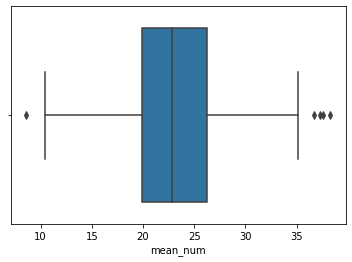

In [39]:
sns.boxplot(df_lotto['mean_num'])

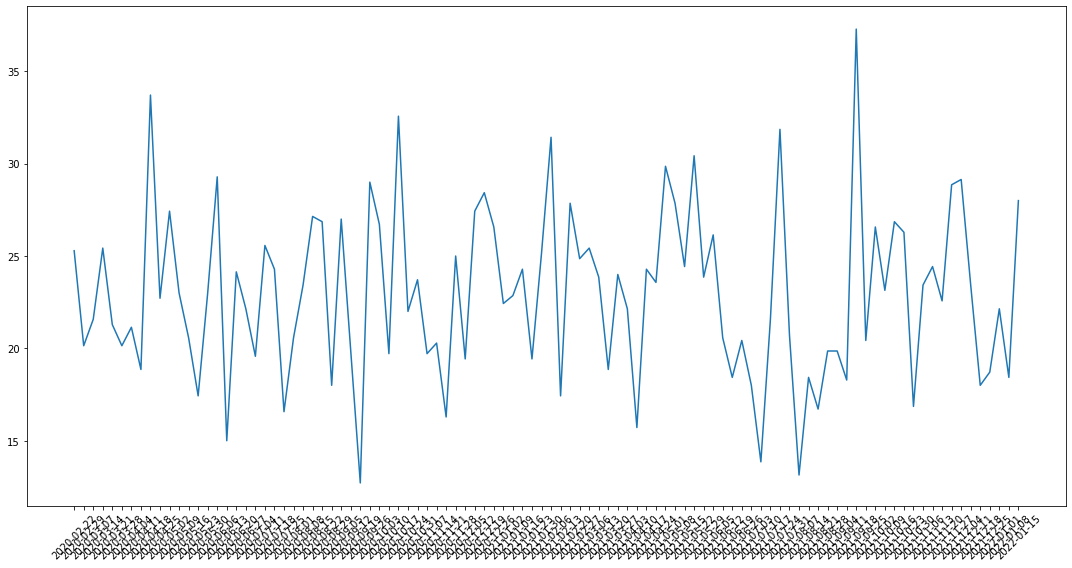

In [78]:
plt.figure(figsize=(15,8))
plt.plot(df_lotto['추첨일'].iloc[-100:], df_lotto['mean_num'].iloc[-100:])
plt.xticks(rotation=45);
plt.tight_layout()

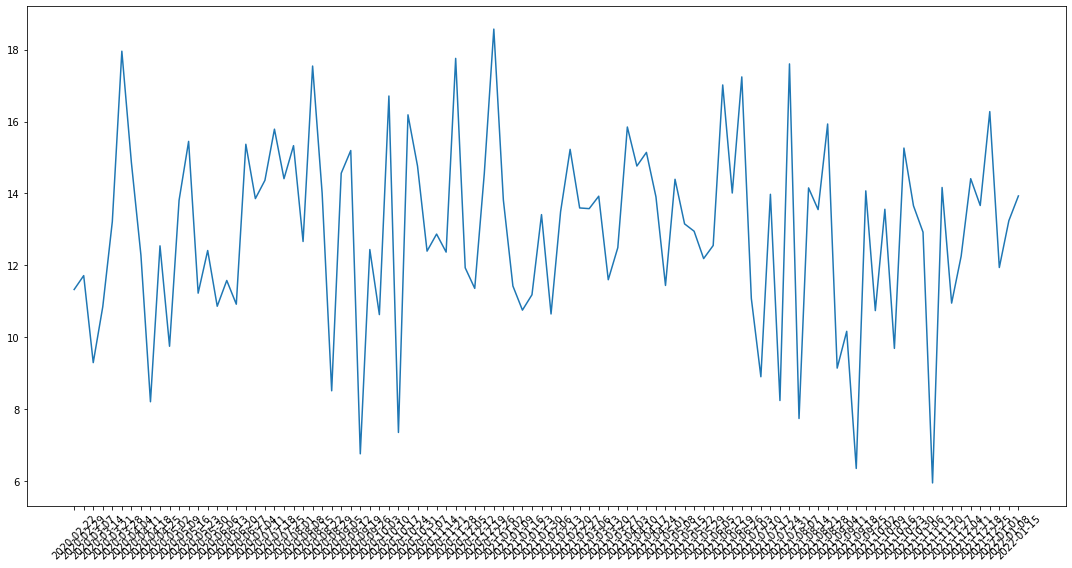

In [79]:
plt.figure(figsize=(15,8))
plt.plot(df_lotto['추첨일'].iloc[-100:], df_lotto['std_num'].iloc[-100:])
plt.xticks(rotation=45);
plt.tight_layout()

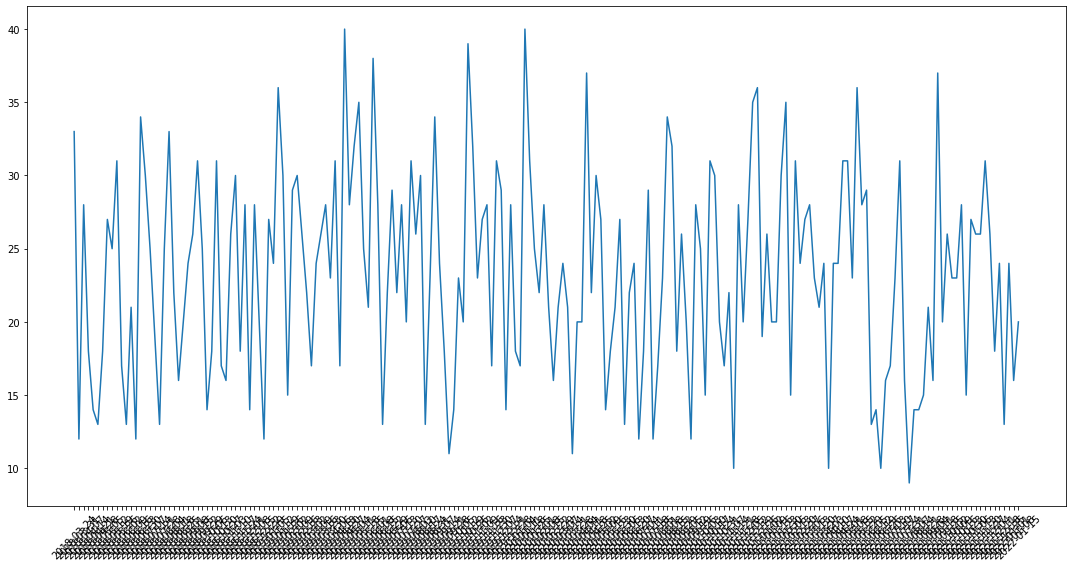

In [77]:
plt.figure(figsize=(15,8))
plt.plot(df_lotto['추첨일'].iloc[-200:], df_lotto['median_num'].iloc[-200:])
plt.xticks(rotation=45);
plt.tight_layout()

In [46]:
# 그냥 랜덤?
# 전 회차?
# 뽑이는 애들끼리의 관계?

## 평균을 binning

In [138]:
print('max : ',df_lotto['mean_num'].max())
bins = np.arange(0,df_lotto['mean_num'].max() + 5, 5)
labels = ['-'.join(map(str,(x,y))) for x, y in zip(bins[:-1], bins[1:])]

df_lotto['bins'] = pd.cut(df_lotto['mean_num'], bins = bins, labels=labels)


max :  38.285714285714285


In [139]:
df_lotto.bins.value_counts(normalize=True) * 100 

21.0-24.0    24.949900
24.0-27.0    21.643287
18.0-21.0    20.941884
27.0-30.0    13.026052
15.0-18.0     8.917836
30.0-33.0     3.907816
12.0-15.0     3.807615
33.0-36.0     1.503006
9.0-12.0      0.801603
36.0-39.0     0.400802
6.0-9.0       0.100200
3.0-6.0       0.000000
0.0-3.0       0.000000
Name: bins, dtype: float64

In [154]:
print('max : ',df_lotto['std_num'].max())
bins = np.arange(0,df_lotto['std_num'].max() + 4, 4)
labels = ['-'.join(map(str,(x,y))) for x, y in zip(bins[:-1], bins[1:])]

df_lotto['bins_std'] = pd.cut(df_lotto['std_num'], bins = bins, labels=labels)


max :  19.483815017060895


In [155]:
df_lotto.bins_std.value_counts(normalize=True) * 100 

12.0-16.0    57.014028
8.0-12.0     28.957916
16.0-20.0    10.420842
4.0-8.0       3.607214
0.0-4.0       0.000000
Name: bins_std, dtype: float64

In [146]:

import random


np.mean(random.sample(range(1,46),6))

result_num_list = []
while len(result_num_list) <10 :
    ran_list = random.sample(range(1,46),6)
    if np.mean(ran_list) >= 20 and np.mean(ran_list) < 25 :
        if np.std(ran_list) >= 12 or np.std(ran_list) < 16 :
            print(ran_list)
            result_num_list.append(ran_list)

from datetime import datetime
from datetime import timedelta

now = datetime.now()

today = f'{now.year}-{now.month}-{now.day}'.format(now.year)

d = datetime.today()    
sat_offset = 5 - d.weekday()

saturday = d + timedelta(days=sat_offset)    
print("Nxt Saturday was on", str(saturday)[:10])

[31, 35, 4, 10, 36, 20]
[45, 9, 4, 39, 16, 24]
[20, 24, 4, 8, 45, 23]
[13, 11, 14, 45, 33, 25]
[39, 20, 4, 10, 12, 40]
[4, 41, 25, 33, 13, 17]
[30, 4, 26, 35, 25, 1]
[27, 43, 20, 21, 7, 6]
[12, 27, 39, 1, 33, 36]
[4, 45, 12, 36, 18, 25]
Nxt Saturday was on 2022-01-22
